### Applied Machine Learning Final Exam

Almut Bohnhoff
<br>Cecilie Sylvest Fosbo
<br>Mette Schønheyder Borch
<br>Anastasiya Strohonova

#### Install All Packages

In [ ]:
# Importing the packages
# for visualization
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for PySpark Context
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext

# for data preprocessing
from pyspark.ml.feature import VectorAssembler, VectorIndexer
from pyspark.ml.feature import PCA
from pyspark.ml.feature import MinMaxScaler

# for PySpark functions and types
from pyspark.sql import functions as F
from pyspark.sql.types import *

# for machine learning modeling
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import RandomForestClassifier, LogisticRegression, OneVsRest, MultilayerPerceptronClassifier, GBTClassifier
from pyspark.ml import Pipeline

#### Initialize Spark Context

In [ ]:
# Initializing the PySpark application SparkContext 
sc = SparkContext.getOrCreate();
sqlContext = SQLContext(sc)


#### Define Schema and Load the Dataset

In [ ]:
# define the schema so the dataframe will have columns and the data has the correct data type
schema = StructType([\
    StructField("X_Minimum", IntegerType(), True),\
    StructField("X_Maximum", IntegerType(), True),\
    StructField("Y_Minimum", IntegerType(), True),\
    StructField("Y_Maximum", IntegerType(), True),\
    StructField("Pixels_Areas", IntegerType(), True),\
    StructField("X_Perimeter", IntegerType(), True),\
    StructField("Y_Perimeter", IntegerType(), True),\
    StructField("Sum_of_Luminosity", IntegerType(), True),\
    StructField("Minimum_of_Luminosity", IntegerType(), True),\
    StructField("Maximum_of_Luminosity", IntegerType(), True),\
    StructField("Length_of_Conveyer", IntegerType(), True),\
    StructField("TypeOfSteel_A300", IntegerType(), True),\
    StructField("TypeOfSteel_A400", IntegerType(), True),\
    StructField("Steel_Plate_Thickness", IntegerType(), True),\
    StructField("Edges_Index",FloatType(), True),\
    StructField("Empty_Index", FloatType(), True),\
    StructField("Square_Index", FloatType(), True),\
    StructField("Outside_X_Index", FloatType(), True),\
    StructField("Edges_X_Index", FloatType(), True),\
    StructField("Edges_Y_Index", FloatType(), True),\
    StructField("Outside_Global_Index", IntegerType(), True),\
    StructField("LogOfAreas", FloatType(), True),\
    StructField("Log_X_Index", FloatType(), True),\
    StructField("Log_Y_Index", FloatType(), True),\
    StructField("Orientation_Index", FloatType(), True),\
    StructField("Luminosity_Index", FloatType(), True),\
    StructField("SigmoidOfAreas", FloatType(), True),\
    StructField("Pastry", IntegerType(), True),\
    StructField("Z_Scratch", IntegerType(), True),\
    StructField("K_Scratch", IntegerType(), True),\
    StructField("Stains", IntegerType(), True),\
    StructField("Dirtiness", IntegerType(), True),\
    StructField("Bumps", IntegerType(), True),\
    StructField("Other_Faults", IntegerType(), True)])

# read the data from the file to a dataframe 
df = spark.read.format("csv").option("delimiter","\t").option("header","false").schema(schema).load("dbfs:/FileStore/shared_uploads/anst20am@student.cbs.dk/Fault_Variables_dataset.csv")




In [ ]:
# see how many rows there are in the dataset
print(df.count())
# show the first five rows to make sure that data has been read correctly
df.show(n=5)

1941
+---------+---------+---------+---------+------------+-----------+-----------+-----------------+---------------------+---------------------+------------------+----------------+----------------+---------------------+-----------+-----------+------------+---------------+-------------+-------------+--------------------+----------+-----------+-----------+-----------------+----------------+--------------+------+---------+---------+------+---------+-----+------------+
X_Minimum|X_Maximum|Y_Minimum|Y_Maximum|Pixels_Areas|X_Perimeter|Y_Perimeter|Sum_of_Luminosity|Minimum_of_Luminosity|Maximum_of_Luminosity|Length_of_Conveyer|TypeOfSteel_A300|TypeOfSteel_A400|Steel_Plate_Thickness|Edges_Index|Empty_Index|Square_Index|Outside_X_Index|Edges_X_Index|Edges_Y_Index|Outside_Global_Index|LogOfAreas|Log_X_Index|Log_Y_Index|Orientation_Index|Luminosity_Index|SigmoidOfAreas|Pastry|Z_Scratch|K_Scratch|Stains|Dirtiness|Bumps|Other_Faults|
+---------+---------+---------+---------+------------+-----------+-----------+-----------------+---------------------+---------------------+------------------+----------------+----------------+---------------------+-----------+-----------+------------+---------------+-------------+-------------+--------------------+----------+-----------+-----------+-----------------+----------------+--------------+------+---------+---------+------+---------+-----+------------+
 42| 50| 270900| 270944| 267| 17| 44| 24220| 76| 108| 1687| 1| 0| 80| 0.0498| 0.2415| 0.1818| 0.0047| 0.4706| 1.0| 1| 2.4265| 0.9031| 1.6435| 0.8182| -0.2913| 0.5822| 1| 0| 0| 0| 0| 0| 0|
 645| 651| 2538079| 2538108| 108| 10| 30| 11397| 84| 123| 1687| 1| 0| 80| 0.7647| 0.3793| 0.2069| 0.0036| 0.6| 0.9667| 1| 2.0334| 0.7782| 1.4624| 0.7931| -0.1756| 0.2984| 1| 0| 0| 0| 0| 0| 0|
 829| 835| 1553913| 1553931| 71| 8| 19| 7972| 99| 125| 1623| 1| 0| 100| 0.971| 0.3426| 0.3333| 0.0037| 0.75| 0.9474| 1| 1.8513| 0.7782| 1.2553| 0.6667| -0.1228| 0.215| 1| 0| 0| 0| 0| 0| 0|
 853| 860| 369370| 369415| 176| 13| 45| 18996| 99| 126| 1353| 0| 1| 290| 0.7287| 0.4413| 0.1556| 0.0052| 0.5385| 1.0| 1| 2.2455| 0.8451| 1.6532| 0.8444| -0.1568| 0.5212| 1| 0| 0| 0| 0| 0| 0|
 1289| 1306| 498078| 498335| 2409| 60| 260| 246930| 37| 126| 1353| 0| 1| 185| 0.0695| 0.4486| 0.0662| 0.0126| 0.2833| 0.9885| 1| 3.3818| 1.2305| 2.4099| 0.9338| -0.1992| 1.0| 1| 0| 0| 0| 0| 0| 0|
+---------+---------+---------+---------+------------+-----------+-----------+-----------------+---------------------+---------------------+------------------+----------------+----------------+---------------------+-----------+-----------+------------+---------------+-------------+-------------+--------------------+----------+-----------+-----------+-----------------+----------------+--------------+------+---------+---------+------+---------+-----+------------+
only showing top 5 rows

In [ ]:
# Use describe function to get an overview of the distribution within the data
df.describe().show()

+-------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+---------------------+---------------------+------------------+-------------------+-------------------+---------------------+-------------------+------------------+------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+-----------------+--------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+
summary| X_Minimum| X_Maximum| Y_Minimum| Y_Maximum| Pixels_Areas| X_Perimeter| Y_Perimeter| Sum_of_Luminosity|Minimum_of_Luminosity|Maximum_of_Luminosity|Length_of_Conveyer| TypeOfSteel_A300| TypeOfSteel_A400|Steel_Plate_Thickness| Edges_Index| Empty_Index| Square_Index| Outside_X_Index| Edges_X_Index| Edges_Y_Index|Outside_Global_Index| LogOfAreas| Log_X_Index| Log_Y_Index|Orientation_Index| Luminosity_Index| SigmoidOfAreas| Pastry| Z_Scratch| K_Scratch| Stains| Dirtiness| Bumps| Other_Faults|
+-------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+---------------------+---------------------+------------------+-------------------+-------------------+---------------------+-------------------+------------------+------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+-----------------+--------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+
 count| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1850| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941| 1941|
 mean|571.1360123647604|617.9644513137558| 1650684.868109222|1650738.705306543|1893.8784131890777|111.85522926326635| 82.96599690880988|206312.14786192685| 84.54868624420402| 130.19371458011335|1459.1602266872746|0.40030911901081917| 0.5996908809891809| 78.73776403915508| 0.3317151982225679|0.4142033488857706|0.5707671298491416|0.033361102542290556| 0.6105286446723862| 0.8134722305458886| 0.5794594594594594|2.4923883564136866| 1.3356861380005178|1.4032712993334397|0.083287635330391|-0.13130504895632353|0.5854204540274796|0.08140133951571354|0.09788768675940238|0.20144255538382277|0.03709428129829984|0.02833590932509016|0.2071097372488408| 0.3467284904688305|
 stddev| 520.690671421655|497.6274102752873|1774578.4147280124|1774590.089000212| 5168.459559501142| 301.2091870967001|426.48287921776455|512293.58760867827| 32.134275700870326| 18.690991866885447| 144.5778233152924|0.49008720796047306|0.49008720796047295| 55.08603169202901|0.29971174855256727|0.1372614888764797|0.2710583842666897| 0.05896116903200014|0.24327691897564652|0.23427362322594883| 0.493779290583693|0.7889298544054687|0.48161160614389087|0.4543451586855305|0.500868046527769| 0.1487668400603868|0.3394518051041304|0.27352094131603694|0.29723930752162486|0.40118122036001264|0.18904154857024516| 0.1659734250668233|0.4053392912663567|0.47605104871940324|
 min| 0| 4| 6712| 6724| 2| 2| 1| 250| 0| 37| 1227| 0| 0| 40| 0.0| 0.0| 0.0083| 0.0015| 0.0144| 0.0484| 0| 0.301| 0.301| 0.0| -0.991| -0.9989| 0.119| 0| 0| 0| 0| 0| 0| 0|
 max| 1705| 1713| 12987661| 12987692| 152655| 10449| 18152| 11591414| 203| 253| 1794| 1| 1| 300| 0.9952| 0.9439| 1.0| 0.8759| 1.0| 1.0| 1| 5.1837| 3.0741| 4.2587| 0.9917| 0.6421| 1.0| 1| 1| 1| 1| 1| 1| 1|
+-------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+------------------+---------------------+---------------------+-----------------

#### Explore and Fill Nulls

In [ ]:
# Use isNull to identify missing values in the dataset
df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).show()

# There are 91 Nulls for Outside_Global_Index

+---------+---------+---------+---------+------------+-----------+-----------+-----------------+---------------------+---------------------+------------------+----------------+----------------+---------------------+-----------+-----------+------------+---------------+-------------+-------------+--------------------+----------+-----------+-----------+-----------------+----------------+--------------+------+---------+---------+------+---------+-----+------------+
X_Minimum|X_Maximum|Y_Minimum|Y_Maximum|Pixels_Areas|X_Perimeter|Y_Perimeter|Sum_of_Luminosity|Minimum_of_Luminosity|Maximum_of_Luminosity|Length_of_Conveyer|TypeOfSteel_A300|TypeOfSteel_A400|Steel_Plate_Thickness|Edges_Index|Empty_Index|Square_Index|Outside_X_Index|Edges_X_Index|Edges_Y_Index|Outside_Global_Index|LogOfAreas|Log_X_Index|Log_Y_Index|Orientation_Index|Luminosity_Index|SigmoidOfAreas|Pastry|Z_Scratch|K_Scratch|Stains|Dirtiness|Bumps|Other_Faults|
+---------+---------+---------+---------+------------+-----------+-----------+-----------------+---------------------+---------------------+------------------+----------------+----------------+---------------------+-----------+-----------+------------+---------------+-------------+-------------+--------------------+----------+-----------+-----------+-----------------+----------------+--------------+------+---------+---------+------+---------+-----+------------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 91| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+---------+---------+---------+---------+------------+-----------+-----------+-----------------+---------------------+---------------------+------------------+----------------+----------------+---------------------+-----------+-----------+------------+---------------+-------------+-------------+--------------------+----------+-----------+-----------+-----------------+----------------+--------------+------+---------+---------+------+---------+-----+------------+

In [ ]:
# Fill the nulls in Outside_Global_Index with a 0 under the assumption that 0 is "No" and 1 "Yes" 
# or similar, with 0 being the default answer

df = df.na.fill(0)

#### Convert to Pandas Dataframe

In [ ]:
# The spark dataframe is converted to a pandas dataframe to be able to visualize the data using
# matplotlib and seaborn libraries
df_pandas = df.toPandas()

#### Combine Labels

In [ ]:
# define a list containing the target columns 
colNames = ['Pastry','Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']

def create_categories(row): 
  # Define a function that creates the target variable by combining the last 7 one-hot encoded columns in the data set
  # that describe all possible faults which can occur on the material 
    if row[colNames[0]] == 1: 
        cat = 1
    elif row[colNames[1]] == 1: 
        cat = 2
    elif row[colNames[2]] == 1: 
        cat = 3
    elif row[colNames[3]] == 1: 
        cat = 4
    elif row[colNames[4]] == 1: 
        cat = 5
    elif row[colNames[5]] == 1: 
        cat = 6
    elif row[colNames[6]] == 1: 
        cat = 7
    else: 
        cat = 0 
    return cat 

# apply the newly defined column on the pandas dataframe 
df_pandas['Target'] = df_pandas.apply(lambda x: create_categories(x), axis=1)
# check that the target column has been properly created
df_pandas.head(20)

Out[9]:

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,Length_of_Conveyer,TypeOfSteel_A300,TypeOfSteel_A400,Steel_Plate_Thickness,Edges_Index,Empty_Index,Square_Index,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scratch,Stains,Dirtiness,Bumps,Other_Faults,Target
0,42,50,270900,270944,267,17,44,24220,76,108,1687,1,0,80,0.0498,0.2415,0.1818,0.0047,0.4706,1.0000,1,2.4265,0.9031,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0,0,1
1,645,651,2538079,2538108,108,10,30,11397,84,123,1687,1,0,80,0.7647,0.3793,0.2069,0.0036,0.6000,0.9667,1,2.0334,0.7782,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0,0,1
2,829,835,1553913,1553931,71,8,19,7972,99,125,1623,1,0,100,0.9710,0.3426,0.3333,0.0037,0.7500,0.9474,1,1.8513,0.7782,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0,0,1
3,853,860,369370,369415,176,13,45,18996,99,126,1353,0,1,290,0.7287,0.4413,0.1556,0.0052,0.5385,1.0000,1,2.2455,0.8451,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0,0,1
4,1289,1306,498078,498335,2409,60,260,246930,37,126,1353,0,1,185,0.0695,0.4486,0.0662,0.0126,0.2833,0.9885,1,3.3818,1.2305,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0,0,1
5,430,441,100250,100337,630,20,87,62357,64,127,1387,0,1,40,0.6200,0.3417,0.1264,0.0079,0.5500,1.0000,1,2.7993,1.0414,1.9395,0.8736,-0.2267,0.9874,1,0,0,0,0,0,0,1
6,413,446,138468,138883,9052,230,432,1481991,23,199,1687,0,1,150,0.4896,0.3390,0.0795,0.0196,0.1435,0.9607,1,3.9567,1.5185,2.6181,0.9205,0.2791,1.0000,1,0,0,0,0,0,0,1
7,190,200,210936,210956,132,11,20,20007,124,172,1687,0,1,150,0.2253,0.3400,0.5000,0.0059,0.9091,1.0000,1,2.1206,1.0000,1.3010,0.5000,0.1841,0.3359,1,0,0,0,0,0,0,1
8,330,343,429227,429253,264,15,26,29748,53,148,1687,0,1,150,0.3912,0.2189,0.5000,0.0077,0.8667,1.0000,1,2.4216,1.1139,1.4150,0.5000,-0.1197,0.5593,1,0,0,0,0,0,0,1
9,74,90,779144,779308,1506,46,167,180215,53,143,1687,0,1,150,0.0877,0.4261,0.0976,0.0095,0.3478,0.9820,1,3.1778,1.2041,2.2148,0.9024,-0.0651,1.0000,1,0,0,0,0,0,0,1


In [ ]:
# Calculate the percentage of each fault given the total number of faults in the data 
(df_pandas.Target.value_counts()/len(df_pandas))*100

Out[10]: 7 34.672849
6 20.710974
3 20.144256
2 9.788769
1 8.140134
4 3.709428
5 2.833591
Name: Target, dtype: float64

#### Intial Visualizations

Out[11]:

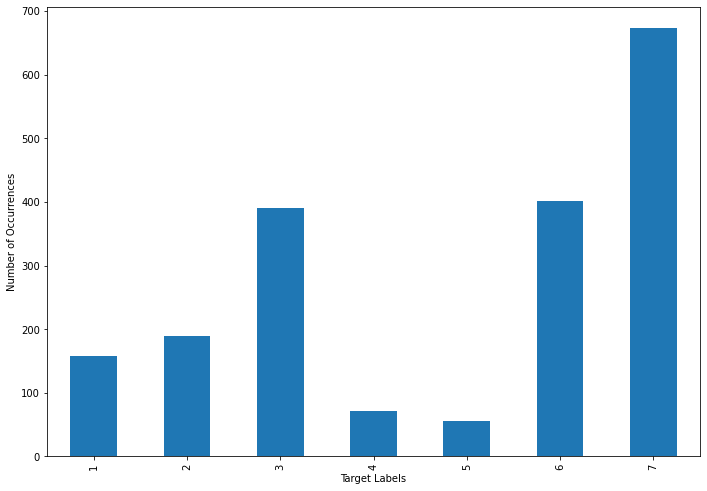

Text(0.5, 0, 'Target Labels')

In [ ]:
# Plot total occurences of each fault per label

# define dimensions
a4_dims = (11.7, 8.27)
# define the figure
fig, axis = plt.subplots(figsize=a4_dims)
# add the Target variable as y-axis
y = df_pandas['Target']
y.value_counts().sort_index().plot.bar()

# define plot labels on x and y axes
plt.ylabel("Number of Occurrences")
plt.xlabel("Target Labels")

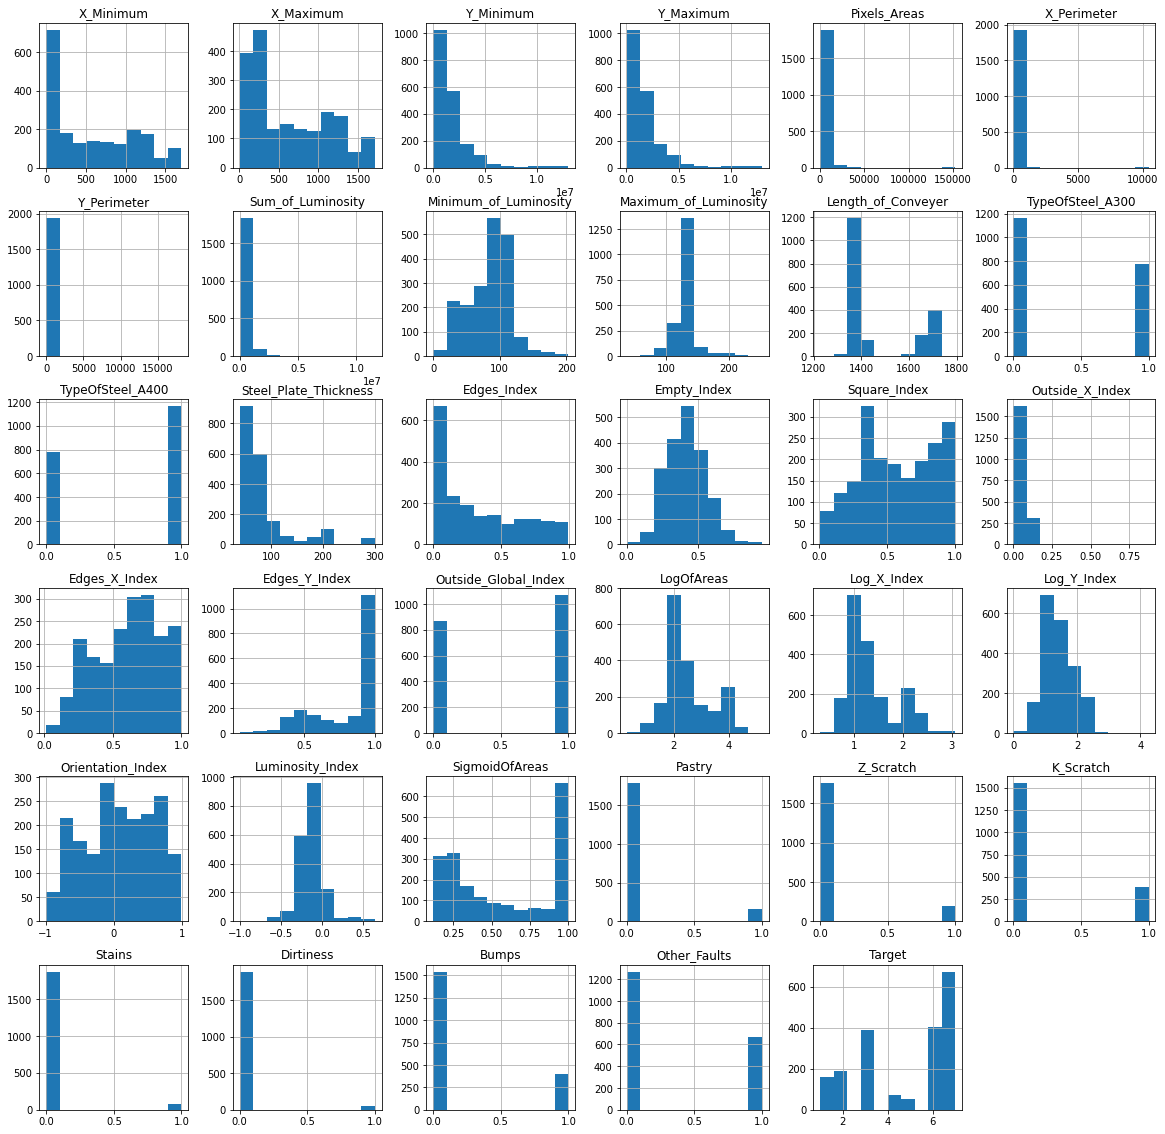

In [ ]:
# Plot historgrams for each feature variable 
df_pandas.hist(figsize=(20,20))
plt.show()

Out[13]:

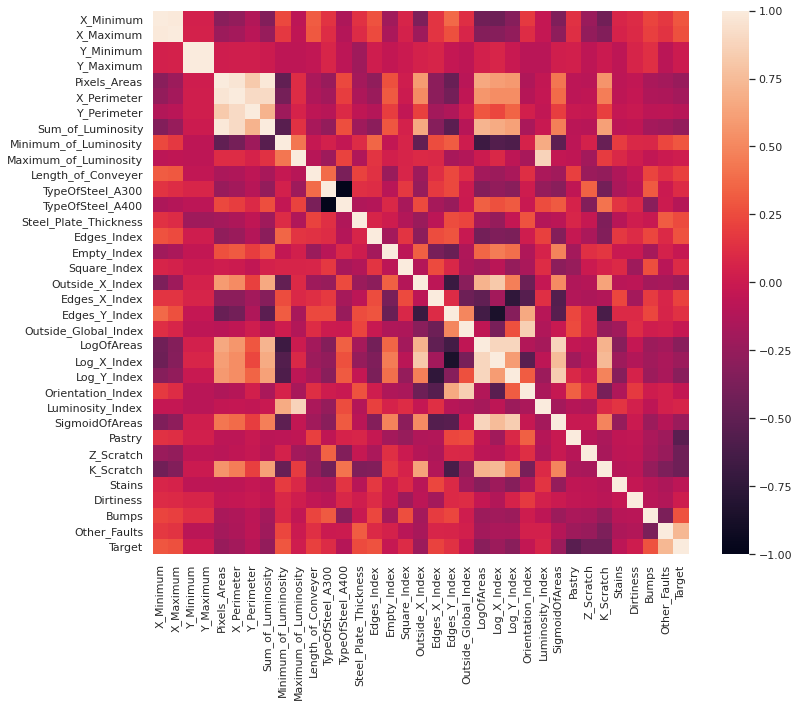

<AxesSubplot:>

In [ ]:
# Plot a heatmap to undestand correlations among the variables, and check if PCA is necessary 
# There are some higher correlations, so PCA could be beneficial for the Company
# 1. benefit: reduce the number of features reduces the cost of computation in terms of time and resources 
# 2. benefit: avoids correlation among the independent variables and impacting the accuracy of any ML model
# set the figure size
sns.set(rc={'figure.figsize':(12,10)})
# calculate the correlations 
corr = df_pandas.corr()
# show the heatmap 
sns.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)

Out[14]:

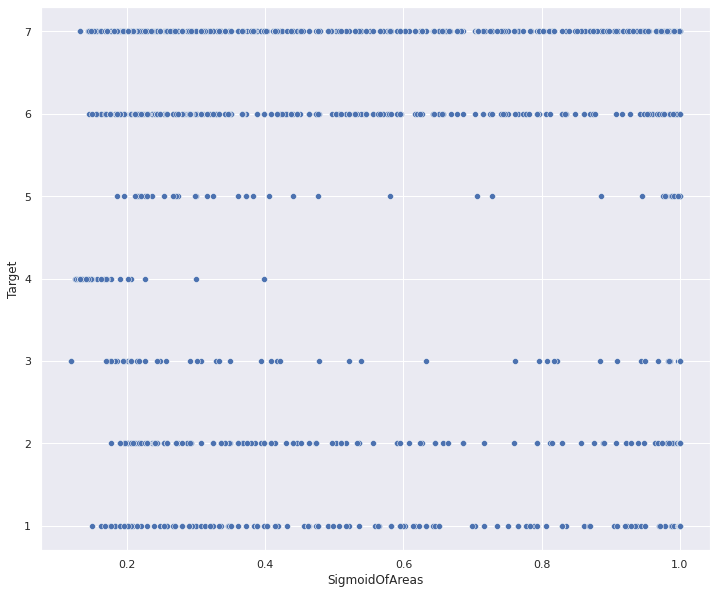

<AxesSubplot:xlabel='SigmoidOfAreas', ylabel='Target'>

In [ ]:
# Plot all data points per variable 
sns.scatterplot(data= df_pandas,x=df_pandas.SigmoidOfAreas, y=df_pandas.Target, legend='full')


In [ ]:
# Calculate the percentages of how often one or the other type of steel is used in the production process
#(df_pandas.TypeOfSteel_A300.value_counts()/len(df_pandas))*100
(df_pandas.TypeOfSteel_A400.value_counts()/len(df_pandas))*100

Out[15]: 1 59.969088
0 40.030912
Name: TypeOfSteel_A400, dtype: float64

In [ ]:
# Calculate the percentage of how often Outside Global Index is equal to 1.0
(df_pandas.Outside_Global_Index.value_counts()/len(df_pandas))*100

Out[16]: 1 55.229263
0 44.770737
Name: Outside_Global_Index, dtype: float64

#### Spark Dataframe for ML Models

In [ ]:
# convert the pandas dataframe back to a spark dataframe to run spark models on the data
df = spark.createDataFrame(df_pandas)
# show the dataframe to check if everything has been converted correctly 
df.show(n=5)

+---------+---------+---------+---------+------------+-----------+-----------+-----------------+---------------------+---------------------+------------------+----------------+----------------+---------------------+-----------+-----------+------------+---------------+-------------+-------------+--------------------+----------+-----------+-----------+-----------------+----------------+--------------+------+---------+---------+------+---------+-----+------------+------+
X_Minimum|X_Maximum|Y_Minimum|Y_Maximum|Pixels_Areas|X_Perimeter|Y_Perimeter|Sum_of_Luminosity|Minimum_of_Luminosity|Maximum_of_Luminosity|Length_of_Conveyer|TypeOfSteel_A300|TypeOfSteel_A400|Steel_Plate_Thickness|Edges_Index|Empty_Index|Square_Index|Outside_X_Index|Edges_X_Index|Edges_Y_Index|Outside_Global_Index|LogOfAreas|Log_X_Index|Log_Y_Index|Orientation_Index|Luminosity_Index|SigmoidOfAreas|Pastry|Z_Scratch|K_Scratch|Stains|Dirtiness|Bumps|Other_Faults|Target|
+---------+---------+---------+---------+------------+-----------+-----------+-----------------+---------------------+---------------------+------------------+----------------+----------------+---------------------+-----------+-----------+------------+---------------+-------------+-------------+--------------------+----------+-----------+-----------+-----------------+----------------+--------------+------+---------+---------+------+---------+-----+------------+------+
 42| 50| 270900| 270944| 267| 17| 44| 24220| 76| 108| 1687| 1| 0| 80| 0.0498| 0.2415| 0.1818| 0.0047| 0.4706| 1.0| 1| 2.4265| 0.9031| 1.6435| 0.8182| -0.2913| 0.5822| 1| 0| 0| 0| 0| 0| 0| 1|
 645| 651| 2538079| 2538108| 108| 10| 30| 11397| 84| 123| 1687| 1| 0| 80| 0.7647| 0.3793| 0.2069| 0.0036| 0.6| 0.9667| 1| 2.0334| 0.7782| 1.4624| 0.7931| -0.1756| 0.2984| 1| 0| 0| 0| 0| 0| 0| 1|
 829| 835| 1553913| 1553931| 71| 8| 19| 7972| 99| 125| 1623| 1| 0| 100| 0.971| 0.3426| 0.3333| 0.0037| 0.75| 0.9474| 1| 1.8513| 0.7782| 1.2553| 0.6667| -0.1228| 0.215| 1| 0| 0| 0| 0| 0| 0| 1|
 853| 860| 369370| 369415| 176| 13| 45| 18996| 99| 126| 1353| 0| 1| 290| 0.7287| 0.4413| 0.1556| 0.0052| 0.5385| 1.0| 1| 2.2455| 0.8451| 1.6532| 0.8444| -0.1568| 0.5212| 1| 0| 0| 0| 0| 0| 0| 1|
 1289| 1306| 498078| 498335| 2409| 60| 260| 246930| 37| 126| 1353| 0| 1| 185| 0.0695| 0.4486| 0.0662| 0.0126| 0.2833| 0.9885| 1| 3.3818| 1.2305| 2.4099| 0.9338| -0.1992| 1.0| 1| 0| 0| 0| 0| 0| 0| 1|
+---------+---------+---------+---------+------------+-----------+-----------+-----------------+---------------------+---------------------+------------------+----------------+----------------+---------------------+-----------+-----------+------------+---------------+-------------+-------------+--------------------+----------+-----------+-----------+-----------------+----------------+--------------+------+---------+---------+------+---------+-----+------------+------+
only showing top 5 rows

In [ ]:
# Drop the redundant one-hot-encoded previous fault columns in favor of the newly created Target column
df = df.drop('Pastry','Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults')

#### Vector Assembler

In [ ]:
# Remove the target column from the input feature set.
featuresCols = df.columns
featuresCols.remove("Target")
 
# vectorAssembler combines all feature columns into a single feature vector column, "rawFeatures".
vectorAssembler = VectorAssembler(inputCols=featuresCols, outputCol="rawFeatures", handleInvalid='skip')
 
# vectorIndexer identifies categorical features and indexes them, and creates a new column "features". 
vectorIndexer = VectorIndexer(inputCol="rawFeatures", outputCol="features", maxCategories=4)

# Transform the data using the assembler and indexer instantiations 
# to prepare the data for scaling and the pca
df_pca = vectorAssembler.transform(df)
df_pca = vectorIndexer.fit(df_pca).transform(df_pca)
df_pca.show(10)

+---------+---------+---------+---------+------------+-----------+-----------+-----------------+---------------------+---------------------+------------------+----------------+----------------+---------------------+-----------+-----------+------------+---------------+-------------+-------------+--------------------+----------+-----------+-----------+-----------------+----------------+--------------+------+--------------------+--------------------+
X_Minimum|X_Maximum|Y_Minimum|Y_Maximum|Pixels_Areas|X_Perimeter|Y_Perimeter|Sum_of_Luminosity|Minimum_of_Luminosity|Maximum_of_Luminosity|Length_of_Conveyer|TypeOfSteel_A300|TypeOfSteel_A400|Steel_Plate_Thickness|Edges_Index|Empty_Index|Square_Index|Outside_X_Index|Edges_X_Index|Edges_Y_Index|Outside_Global_Index|LogOfAreas|Log_X_Index|Log_Y_Index|Orientation_Index|Luminosity_Index|SigmoidOfAreas|Target| rawFeatures| features|
+---------+---------+---------+---------+------------+-----------+-----------+-----------------+---------------------+---------------------+------------------+----------------+----------------+---------------------+-----------+-----------+------------+---------------+-------------+-------------+--------------------+----------+-----------+-----------+-----------------+----------------+--------------+------+--------------------+--------------------+
 42| 50| 270900| 270944| 267| 17| 44| 24220| 76| 108| 1687| 1| 0| 80| 0.0498| 0.2415| 0.1818| 0.0047| 0.4706| 1.0| 1| 2.4265| 0.9031| 1.6435| 0.8182| -0.2913| 0.5822| 1|[42.0,50.0,270900...|[42.0,50.0,270900...|
 645| 651| 2538079| 2538108| 108| 10| 30| 11397| 84| 123| 1687| 1| 0| 80| 0.7647| 0.3793| 0.2069| 0.0036| 0.6| 0.9667| 1| 2.0334| 0.7782| 1.4624| 0.7931| -0.1756| 0.2984| 1|[645.0,651.0,2538...|[645.0,651.0,2538...|
 829| 835| 1553913| 1553931| 71| 8| 19| 7972| 99| 125| 1623| 1| 0| 100| 0.971| 0.3426| 0.3333| 0.0037| 0.75| 0.9474| 1| 1.8513| 0.7782| 1.2553| 0.6667| -0.1228| 0.215| 1|[829.0,835.0,1553...|[829.0,835.0,1553...|
 853| 860| 369370| 369415| 176| 13| 45| 18996| 99| 126| 1353| 0| 1| 290| 0.7287| 0.4413| 0.1556| 0.0052| 0.5385| 1.0| 1| 2.2455| 0.8451| 1.6532| 0.8444| -0.1568| 0.5212| 1|[853.0,860.0,3693...|[853.0,860.0,3693...|
 1289| 1306| 498078| 498335| 2409| 60| 260| 246930| 37| 126| 1353| 0| 1| 185| 0.0695| 0.4486| 0.0662| 0.0126| 0.2833| 0.9885| 1| 3.3818| 1.2305| 2.4099| 0.9338| -0.1992| 1.0| 1|[1289.0,1306.0,49...|[1289.0,1306.0,49...|
 430| 441| 100250| 100337| 630| 20| 87| 62357| 64| 127| 1387| 0| 1| 40| 0.62| 0.3417| 0.1264| 0.0079| 0.55| 1.0| 1| 2.7993| 1.0414| 1.9395| 0.8736| -0.2267| 0.9874| 1|[430.0,441.0,1002...|[430.0,441.0,1002...|
 413| 446| 138468| 138883| 9052| 230| 432| 1481991| 23| 199| 1687| 0| 1| 150| 0.4896| 0.339| 0.0795| 0.0196| 0.1435| 0.9607| 1| 3.9567| 1.5185| 2.6181| 0.9205| 0.2791| 1.0| 1|[413.0,446.0,1384...|[413.0,446.0,1384...|
 190| 200| 210936| 210956| 132| 11| 20| 20007| 124| 172| 1687| 0| 1| 150| 0.2253| 0.34| 0.5| 0.0059| 0.9091| 1.0| 1| 2.1206| 1.0| 1.301| 0.5| 0.1841| 0.3359| 1|[190.0,200.0,2109...|[190.0,200.0,2109...|
 330| 343| 429227| 429253| 264| 15| 26| 29748| 53| 148| 1687| 0| 1| 150| 0.3912| 0.2189| 0.5| 0.0077| 0.8667| 1.0| 1| 2.4216| 1.1139| 1.415| 0.5| -0.1197| 0.5593| 1|[330.0,343.0,4292...|[330.0,343.0,4292...|
 74| 90| 779144| 779308| 1506| 46| 167| 180215| 53| 143| 1687| 0| 1| 150| 0.0877| 0.4261| 0.0976| 0.0095| 0.3478| 0.982| 1| 3.1778| 1.2041| 2.2148| 0.9024| -0.0651| 1.0| 1|[74.0,90.0,779144...|[74.0,90.0,779144...|
+---------+---------+---------+---------+------------+-----------+-----------+-----------------+---------------------+---------------------+------------------+----------------+----------------+---------------------+-----------+-----------+------------+---------------+-------------+-------------+--------------------+----------+-----------+-----------+-----------------+----------------+--------------+------+--------------------+--------------------+
only showing top 10 rows

#### Stratified Train Test Split

In [ ]:
# create a list of all possible fault values
values = [1,3,4,5,6,7]

# filter dataframe for each fault value and split the dataset into a training and test set to create a random but stratified train and test set
for x in values:
    # filter
    filtered = df_pca.filter(df_pca["Target"]==x)
    # split datasets into training and testing
    train1, test1 = filtered.randomSplit([0.8,0.2], seed=123)
    if x == 1:
        # filter again 
        filtered = df_pca.filter(df_pca["Target"]==2)
        train2, test2 = filtered.randomSplit([0.8, 0.2], seed=123)
        # stack datasets back together
        train = train1.union(train2)
        test = test1.union(test2)
    else:
        # union the train and test sets again 
        train = train.union(train1)
        test = test.union(test1)

# Print the number of rows in train and test sets to ensure they have been created correctly 
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 1577
Test Dataset Count: 364

In [ ]:
# get an overview of how many data points for each fault value ended up in the training set
train.groupBy("Target").count().show()

+------+-----+
Target|count|
+------+-----+
 1| 126|
 2| 154|
 3| 316|
 4| 63|
 5| 47|
 6| 329|
 7| 542|
+------+-----+

#### Scaling

In [ ]:
# Instantiate the scaler to scale the features to reduce the impact of very large features on the model, 
# including the impact any outliers may have on the models 
scaler = MinMaxScaler(inputCol="features", outputCol="scaledFeatures")

# Compute summary statistics and generate MinMaxScalerModel
scalerModel = scaler.fit(train)

# rescale each feature to range [min, max].
scaled_train = scalerModel.transform(train)
scaled_test = scalerModel.transform(test)
print("Features scaled to range: [%f, %f]" % (scaler.getMin(), scaler.getMax()))
scaled_train.select("features", "scaledFeatures").show()

Features scaled to range: [0.000000, 1.000000]
+--------------------+--------------------+
 features| scaledFeatures|
+--------------------+--------------------+
[0.0,10.0,1701480...|[0.0,0.0035108250...|
[5.0,13.0,1137189...|[0.00293255131964...|
[10.0,22.0,167820...|[0.00586510263929...|
[11.0,20.0,284522...|[0.00645161290322...|
[12.0,24.0,304433...|[0.00703812316715...|
[13.0,24.0,251289...|[0.00762463343108...|
[14.0,23.0,146124...|[0.00821114369501...|
[15.0,24.0,162068...|[0.00879765395894...|
[16.0,26.0,786881...|[0.00938416422287...|
[16.0,26.0,137774...|[0.00938416422287...|
[18.0,26.0,471253...|[0.01055718475073...|
[19.0,28.0,808173...|[0.01114369501466...|
[30.0,38.0,227767...|[0.01759530791788...|
[34.0,40.0,914648...|[0.01994134897360...|
[41.0,54.0,1.2577...|[0.02404692082111...|
[42.0,50.0,270900...|[0.02463343108504...|
[43.0,52.0,86284....|[0.02521994134897...|
[46.0,58.0,179258...|[0.02697947214076...|
[57.0,69.0,33796....|[0.03343108504398...|
[62.0,74.0,1.2987...|[0.03636363636363...|
+--------------------+--------------------+
only showing top 20 rows

#### PCA

In [ ]:
# Instantiate the PCA to reduce the number of features to 14 instead of 27
pca = PCA(k=14, inputCol="scaledFeatures", outputCol="pcaFeatures")

# Fit the training data to the PCA
pcaModel = pca.fit(scaled_train)

# Show how much variation in the data can be explained with the reduced feature number
n_components = pcaModel.explainedVariance.sum()
print("Explained variance: ", n_components)

# Transform the training and test data using the PCA model
pca_train = pcaModel.transform(scaled_train)
pca_test = pcaModel.transform(scaled_test)

# Show the dataframe to check that the pcaFeatures have been created correctly
pca_train.select('pcaFeatures').show(n=1, truncate=False)

Explained variance: 0.9935180090229901
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
pcaFeatures |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
[0.6185725470902914,-1.381870735976943,0.24813289856234835,-0.026817106910648703,-0.22256699756593007,-0.4313088967221161,-0.05880282431113518,0.049798306786242266,-0.37384725129470814,0.050633526464878356,-0.07484120754364657,-1.1366447365957164,0.2422373720200666,-0.9368810300063457]|
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
only showing top 1 row

In [ ]:
pca_train = pca_train.select(['pcaFeatures', 'Target'])
pca_test = pca_test.select(['pcaFeatures', 'Target'])

#### Define Evaluator

In [ ]:
# The evaluator is used for evaluating the machine learning models.
# In particular, it uses the measure of accuracy to determine the feasibility of the ML models. 
evaluator = MulticlassClassificationEvaluator(labelCol="Target", predictionCol="prediction")

#### Random Forest for Feature Importance

Out[26]:

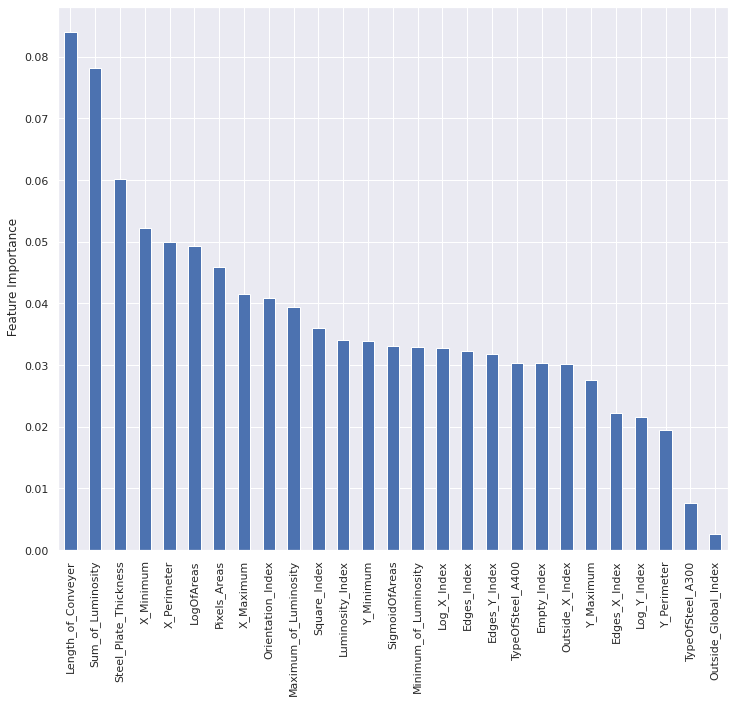

<AxesSubplot:ylabel=' Feature Importance'>

In [ ]:
# The feature importance from the Random Forest shows what Variables have the biggest impact on the prediction
rf_fi = RandomForestClassifier(featuresCol = 'scaledFeatures', labelCol = 'Target', maxDepth=20, seed = 20, numTrees= 15)
rfModel_fi = rf_fi.fit(scaled_train)

# create a dataframe of the feature importances and the feature columns
features_imp_pd = (pd.DataFrame(rfModel_fi.featureImportances.toArray(), index=featuresCols, columns=['importance']))
# plot the feature importance in a bar chart with each feature column and the feature importance value
features_imp_pd.sort_values(by="importance", ascending=False).plot(kind="bar", ylabel= " Feature Importance", legend=False)

#### Random Forest for Prediction

In [ ]:
# instantiate the Random Forest Classifier
rf = RandomForestClassifier(featuresCol = 'pcaFeatures', labelCol = 'Target', maxDepth=20, seed = 20, numTrees= 20)
# train the classifier
rfModel = rf.fit(pca_train)
# predict on the test set using the trained classifier
predictions_rf = rfModel.transform(pca_test)

# evaluation of the model 
accuracy_rf = evaluator.evaluate(predictions_rf)
print("Accuracy = %s" % (accuracy_rf))
print("Test Error = %s" % (1.0 - accuracy_rf))

Accuracy = 0.7629927633584636
Test Error = 0.23700723664153645

In [ ]:
# we will be visualizing these predictions because we have selected this model as our recommendation
# our selection was based off of both accuracy and complexity

# create a dataframe from the predictions to visualize the results
rf_df = predictions_rf.select("Target", "prediction")
rf_df.show(n=5)

+------+----------+
Target|prediction|
+------+----------+
 1| 1.0|
 1| 6.0|
 1| 1.0|
 1| 7.0|
 1| 7.0|
+------+----------+
only showing top 5 rows

In [ ]:
# convert the created dataframe to a pandas dataframe to use the seaborn library
rf_pandas = rf_df.toPandas()

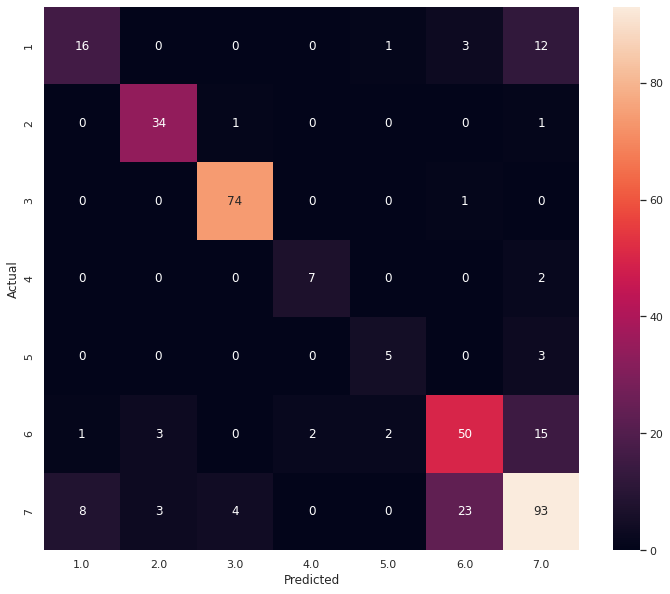

In [ ]:
# calculate the confusion matrix from the pandas dataframe to visualize the acutal vs. predicted results 
confusion_matrix = pd.crosstab(rf_pandas['Target'], rf_pandas['prediction'], rownames=['Actual'], colnames=['Predicted'])
# set the figure dimensions
sns.set(rc={'figure.figsize':(12,10)})
# create the heatmap
sns.heatmap(confusion_matrix, annot=True, fmt='g')
# show the plot 
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# define a list with the names of the faults
target_names = ['Pastry','Z_Scratch', 'K_Scratch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
# create the classification report for each target label 
print(classification_report(rf_pandas['Target'], rf_pandas['prediction'], target_names=target_names))

precision recall f1-score support

 Pastry 0.64 0.50 0.56 32
 Z_Scratch 0.85 0.94 0.89 36
 K_Scratch 0.94 0.99 0.96 75
 Stains 0.78 0.78 0.78 9
 Dirtiness 0.62 0.62 0.62 8
 Bumps 0.65 0.68 0.67 73
Other_Faults 0.74 0.71 0.72 131

 accuracy 0.77 364
 macro avg 0.75 0.75 0.74 364
weighted avg 0.76 0.77 0.76 364

#### Logistic Regression

In [ ]:
# instantiate the Logistic Regression model 
lr = LogisticRegression(featuresCol='pcaFeatures', labelCol="Target", predictionCol='prediction', maxIter=33, regParam=0.01, elasticNetParam=0)
# train the model 
lrModel = lr.fit(pca_train)
# predict on the test set using the trained Logistic Regression
predictions_lr = lrModel.transform(pca_train)


# evaluation of the model
accuracy_lr = evaluator.evaluate(predictions_lr)
print("Accuracy = %s" % (accuracy_lr))
print("Test Error = %s" % (1.0 - accuracy_lr))


Accuracy = 0.7052488981426294
Test Error = 0.29475110185737063

#### One vs Rest Model

In [ ]:
# instantiate the binary classifier used for the One vs. Rest Model 
gbt = GBTClassifier(featuresCol='pcaFeatures', labelCol="Target", predictionCol='prediction', maxDepth=5, maxBins=32, maxIter=10)

In [ ]:
# instantiate the One Vs Rest Classifier using the GBT instantiated previously
ovr = OneVsRest(featuresCol='pcaFeatures', labelCol="Target", predictionCol='prediction', classifier=gbt)

# train the multiclass model.
ovrModel = ovr.fit(pca_train)

# score the model on test data
predictions_ovr = ovrModel.transform(pca_test)

# compute the classification error on test data.
accuracy_ovr = evaluator.evaluate(predictions_ovr)
print("Accuracy = %s" % (accuracy_ovr))
print("Test Error = %s" % (1.0 - accuracy_ovr))

Accuracy = 0.7151674540419405
Test Error = 0.2848325459580595

#### Neural Network

In [ ]:
# instantiate the MLPC model 
# 14 input features through the pca
# 8 outputs / target labels 
mlpc=MultilayerPerceptronClassifier(featuresCol="pcaFeatures",labelCol="Target",predictionCol='prediction',layers = [14,16,8],maxIter=1000,blockSize=15,seed=7,solver='l-bfgs')

# Number of hidden layers: Number of units in hidden-layer = ceil((Number of inputs + outputs) * (2/3))

# train the ANN on the training set
ann = mlpc.fit(pca_train)
# predict on the test set 
predictions_ann = ann.transform(pca_test)
# score the model 
accuracy_ann = evaluator.evaluate(predictions_ann)
print("Accuracy on our test set: %g" % accuracy_ann)
print("Test Error = %s" % (1.0 - accuracy_ann))

Accuracy on our test set: 0.689151
Test Error = 0.31084910762841944

# All models without PCA

All preprocessing steps are the same, excluding PCA.

### Random Forest

In [ ]:
# instantiate the Random Forest
rf2 = RandomForestClassifier(featuresCol = 'scaledFeatures', labelCol = 'Target', maxDepth=20, seed = 20, numTrees= 15)
# train the Random Forest on the scaled training set 
rfModel2 = rf2.fit(scaled_train)
# predict on the test set 
predictions_rf2 = rfModel2.transform(scaled_test)

# evaluation of the model 
accuracy_rf2 = evaluator.evaluate(predictions_rf2)
print("Accuracy = %s" % (accuracy_rf2))
print("Test Error = %s" % (1.0 - accuracy_rf2))

# feature importance
features_imp_pd = (pd.DataFrame(rfModel2.featureImportances.toArray(), index=featuresCols, columns=['importance']))
print(features_imp_pd.sort_values(by="importance", ascending=False))

Accuracy = 0.7892309055344313
Test Error = 0.21076909446556868
 importance
Length_of_Conveyer 0.083903
Sum_of_Luminosity 0.078132
Steel_Plate_Thickness 0.060104
X_Minimum 0.052218
X_Perimeter 0.050008
LogOfAreas 0.049355
Pixels_Areas 0.045899
X_Maximum 0.041541
Orientation_Index 0.040818
Maximum_of_Luminosity 0.039375
Square_Index 0.036005
Luminosity_Index 0.034078
Y_Minimum 0.033871
SigmoidOfAreas 0.033083
Minimum_of_Luminosity 0.032888
Log_X_Index 0.032783
Edges_Index 0.032329
Edges_Y_Index 0.031795
TypeOfSteel_A400 0.030329
Empty_Index 0.030297
Outside_X_Index 0.030102
Y_Maximum 0.027597
Edges_X_Index 0.022211
Log_Y_Index 0.021527
Y_Perimeter 0.019466
TypeOfSteel_A300 0.007702
Outside_Global_Index 0.002583

### Logistic Regression

In [ ]:
# instantiate the model
lr2 = LogisticRegression(featuresCol='scaledFeatures', labelCol="Target", predictionCol='prediction', maxIter=33, regParam=0.01, elasticNetParam=0)
# train the model 
lrModel2 = lr2.fit(scaled_train)
# predict on the test set using the trained Logistic Regression 
predictions_lr2 = lrModel2.transform(scaled_test)

# evaluate the model 
accuracy_lr2 = evaluator.evaluate(predictions_lr2)
print("Accuracy = %s" % (accuracy_lr2))
print("Test Error = %s" % (1.0 - accuracy_lr2))



Accuracy = 0.7397513197291207
Test Error = 0.26024868027087933

### One Vs. Rest Model

In [ ]:
# base classifier GBT is instantiated
gbt2 = GBTClassifier(featuresCol='scaledFeatures', labelCol="Target", predictionCol='prediction', maxDepth=5, maxBins=32, maxIter=10)

# instantiate the One Vs Rest Classifier.
ovr2 = OneVsRest(featuresCol='scaledFeatures', labelCol="Target", predictionCol='prediction', classifier=gbt2)

# train the multiclass model.
ovrModel2 = ovr2.fit(scaled_train)

# score the model on test data.
predictions_ovr2 = ovrModel2.transform(scaled_test)

# compute the classification error on test data.
accuracy_ovr2 = evaluator.evaluate(predictions_ovr2)
print("Accuracy = %s" % (accuracy_ovr2))
print("Test Error = %s" % (1.0 - accuracy_ovr2))

Accuracy = 0.751899529757497
Test Error = 0.24810047024250304

### Neural Network

In [ ]:
# instantiate the ANN (MLPC) with 27 input neurons and 8 output neurons due to input variable number and number of faults
mlpc2=MultilayerPerceptronClassifier(featuresCol="scaledFeatures",labelCol="Target",predictionCol='prediction',layers = [27,16,8],maxIter=1000,blockSize=15,seed=7,solver='l-bfgs')

# Number of hidden layers: Number of units in hidden-layer = ceil((Number of inputs + outputs) * (2/3))

# train the model 
ann2 = mlpc2.fit(scaled_train)
# predict on the ANN using the scaled testing set
predictions_ann2 = ann2.transform(scaled_test)
# evaluate the model 
accuracy_ann2 = evaluator.evaluate(predictions_ann2)
print("Accuracy on our test set: %g" % accuracy_ann2)
print("Test Error = %s" % (1.0 - accuracy_ann2))

Accuracy on our test set: 0.686289
Test Error = 0.31371148847038977

# All models without Feature Scaling

All preprocessing steps are the same, exluding scaling and PCA.

#### Logistic Regression Baseline Model

In [ ]:
# establishing baseline with non-scaled, non-PCA data to understand base performance of simple, unoptimized LR model
# provides a basis for comparison in optimization

lr3_base = LogisticRegression(featuresCol='features', labelCol="Target", predictionCol='prediction', maxIter=10, regParam=0.3, elasticNetParam=0.8)
# train the model using the training set
lrModel3_base = lr3_base.fit(train)
# predict on the test set using the trained model 
predictions_lr3_base = lrModel3_base.transform(test)

# evaluate the model 
accuracy_lr3_base = evaluator.evaluate(predictions_lr3_base)
print("Accuracy = %s" % (accuracy_lr3_base))
print("Test Error = %s" % (1.0 - accuracy_lr3_base))


Accuracy = 0.1904872904872905
Test Error = 0.8095127095127095

### Random Forest

In [ ]:
# instantiate the model 
rf3 = RandomForestClassifier(featuresCol = 'features', labelCol = 'Target', maxDepth=20, seed = 20, numTrees= 15)
# train the model using the training set
rfModel3 = rf3.fit(train)
# predict on the testing set using the trained model 
predictions_rf3 = rfModel3.transform(test)

# evaluation of the model 
accuracy_rf3 = evaluator.evaluate(predictions_rf3)
print("Accuracy = %s" % (accuracy_rf3))
print("Test Error = %s" % (1.0 - accuracy_rf3))

# create a dataframe to collect feature importances 
features_imp_pd = (pd.DataFrame(rfModel3.featureImportances.toArray(), index=featuresCols, columns=['importance']))
# print feature importances sorted 
print(features_imp_pd.sort_values(by="importance", ascending=False))

Accuracy = 0.7892309055344313
Test Error = 0.21076909446556868
 importance
Length_of_Conveyer 0.083903
Sum_of_Luminosity 0.078132
Steel_Plate_Thickness 0.060104
X_Minimum 0.052218
X_Perimeter 0.050008
LogOfAreas 0.049355
Pixels_Areas 0.045899
X_Maximum 0.041541
Orientation_Index 0.040818
Maximum_of_Luminosity 0.039375
Square_Index 0.036005
Luminosity_Index 0.034078
Y_Minimum 0.033871
SigmoidOfAreas 0.033083
Minimum_of_Luminosity 0.032888
Log_X_Index 0.032783
Edges_Index 0.032329
Edges_Y_Index 0.031795
TypeOfSteel_A400 0.030329
Empty_Index 0.030297
Outside_X_Index 0.030102
Y_Maximum 0.027597
Edges_X_Index 0.022211
Log_Y_Index 0.021527
Y_Perimeter 0.019466
TypeOfSteel_A300 0.007702
Outside_Global_Index 0.002583

### Logistic Regression

In [ ]:
# instantiate the logistic regression model 
lr3 = LogisticRegression(featuresCol='features', labelCol="Target", predictionCol='prediction', maxIter=33, regParam=0.01, elasticNetParam=0)
# train the model using the training set
lrModel3 = lr3.fit(train)
# predict on the test set using the trained model 
predictions_lr3 = lrModel3.transform(test)

# evaluate the model 
accuracy_lr3 = evaluator.evaluate(predictions_lr3)
print("Accuracy = %s" % (accuracy_lr3))
print("Test Error = %s" % (1.0 - accuracy_lr3))



Accuracy = 0.6923796902625278
Test Error = 0.30762030973747223

### One vs. Rest Model

In [ ]:
# base classifier GBT is instantiated
gbt3 = GBTClassifier(featuresCol='features', labelCol="Target", predictionCol='prediction', maxDepth=5, maxBins=32, maxIter=10)

# instantiate the One Vs Rest Classifier.
ovr3 = OneVsRest(featuresCol='features', labelCol="Target", predictionCol='prediction', classifier=gbt3)

# train the multiclass model.
ovrModel3 = ovr3.fit(train)

# score the model on test data.
predictions_ovr3 = ovrModel3.transform(test)

# compute the classification error on test data.
accuracy_ovr3 = evaluator.evaluate(predictions_ovr3)
print("Accuracy = %s" % (accuracy_ovr3))
print("Test Error = %s" % (1.0 - accuracy_ovr3))

Accuracy = 0.751899529757497
Test Error = 0.24810047024250304

### Neural Network

In [ ]:
# instantiate the ANN (MLPC) using 27 input neurons and 8 output neurons corresponding to input variables and target labels 
mlpc3 = MultilayerPerceptronClassifier(featuresCol="features",labelCol="Target",predictionCol='prediction',layers = [27,16,8],maxIter=1000,blockSize=15,seed=7,solver='l-bfgs')

# train the model 
ann3 = mlpc3.fit(train)

# predict on the test set using the trained model 
predictions_ann3 = ann3.transform(test)

# evaluate the model 
accuracy_ann3 = evaluator.evaluate(predictions_ann3)
print("Accuracy on our test set: %g" % accuracy_ann3)
print("Test Error = %s" % (1.0 - accuracy_ann3))

Accuracy on our test set: 0.272791
Test Error = 0.7272094926350245